# Problem Statement:
Prepare a complete data analysis report on the concrete data. 

# Data Description:
Concrete is a building block of most construction and it is the most important material in Civil engineering.
The concrete compressive strength is a highly nonlinear function of age
and ingredients. These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate.
The actual concrete compressive strength (MPa) for a given mixture under a specific
age (days) was determined from the laboratory. Data is in raw form (not scaled).The
data has 8 quantitative input variables, and 1 quantitative output variable, and 1030
instances (observations).

## List Of Contents
   ### 1. Importing Libraries
   ### 2. Domain Analysis
   ### 3. Basic Checks
   ### 4. Exploratory Data Analysis
   ### 5. Data Pre Processing
   ### 6. Feature Selection
   ### 7. Model Creation
   ### 8. Model Evaluation
   ### 9. Evaluation Summary
   ### 10. Conclusion

## Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the dataset
data = pd.read_csv('concrete.csv')

In [3]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Domain Analysis

1. **Cement**:- cement is a binder, a chemical substance used for construction that sets, hardens and adheres to other materials to bind them together. Cement mixed with sand and gravel produces concrete. It is measured in kg in a m3 mixture.


2. **Slag**:- Slag is also called as synthetic aggregate. As the amount of slag increases, the late-age compressive strength of concrete mixture increases. It is measured in kg in a m3 mixture.


3. **Ash**:- Fly ash reduces cracking, permeability and bleeding, creating a dense and high-durability concrete. This concrete mix also requires less water and has a tendency to resist shrinking. It is measured in kg in a m3 mixture.


4. **Water**:- water is an inorganic compound, water makes up about 15%-18% of the total concrete volume. Water causes the hardening of concrete through a process called hydration. It is measured in kg in a m3 mixture.


5. **Superplasticizers**:- These are additives used for making high-strength concrete. Superplasticizers allow reduction in water conctent by 30% or more. It is measured in kg in a m3 mixture.


6. **Coarse Aggregate**:- Aggregates having a size of more than 4.75mm are said to be coarse aggregate. These are irregular and granular materials susc as sand, gravel or crushed stone. These are used as a filler material in concrete. It is measured in kg in a m3 mixture.


7. **Fine Aggregate**:- Fine aggregate are the particles that pass through 4.75mm sieve and retain on 0.075mm sieve. These helps to make concrete mixes more compact and contribute to the mechanical strength of the concrete. It is measured in kg in a m3 mixture.


8. **Age**:- Age of concrete comprehensively reflects the physical properties of the concrete. It is measured in days (1~365).


9. **Comprehensive Strength**:- Comprehensive Strength of concrete is the strength of hardened concrete measured by the compression test. It is the measure of concrete's ability to resist loads which tend to compress the concrete. It is measured in Mpa.

## Basic checks

In [4]:
# Getting first 5 rows
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# Getting last 5 rows
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [6]:
## Finding the shape of dataset
data.shape

(1030, 9)

### The dataset has 1030 records and 9 features.

In [7]:
## Quick summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
## Finding duplicate records
data.duplicated().sum()

25

### There are 25 duplicate records in the dataset. Let's remove the duplicate records.

In [9]:
## Dropping the duplicate records
data=data.drop_duplicates()

In [10]:
## Shpe of dataset after dropping the duplicate records
data.shape

(1005, 9)

In [11]:
## Statistical information about numerical data
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### There is no 0.00 constant standard deviation columns.
### There are no categorical features in the dataset.

In [12]:
## Checking for null values
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### There are no null values in the dataset.

# Exploratory Data Analysis

In [13]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

                                             |                                                                …

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Univariate Analysis

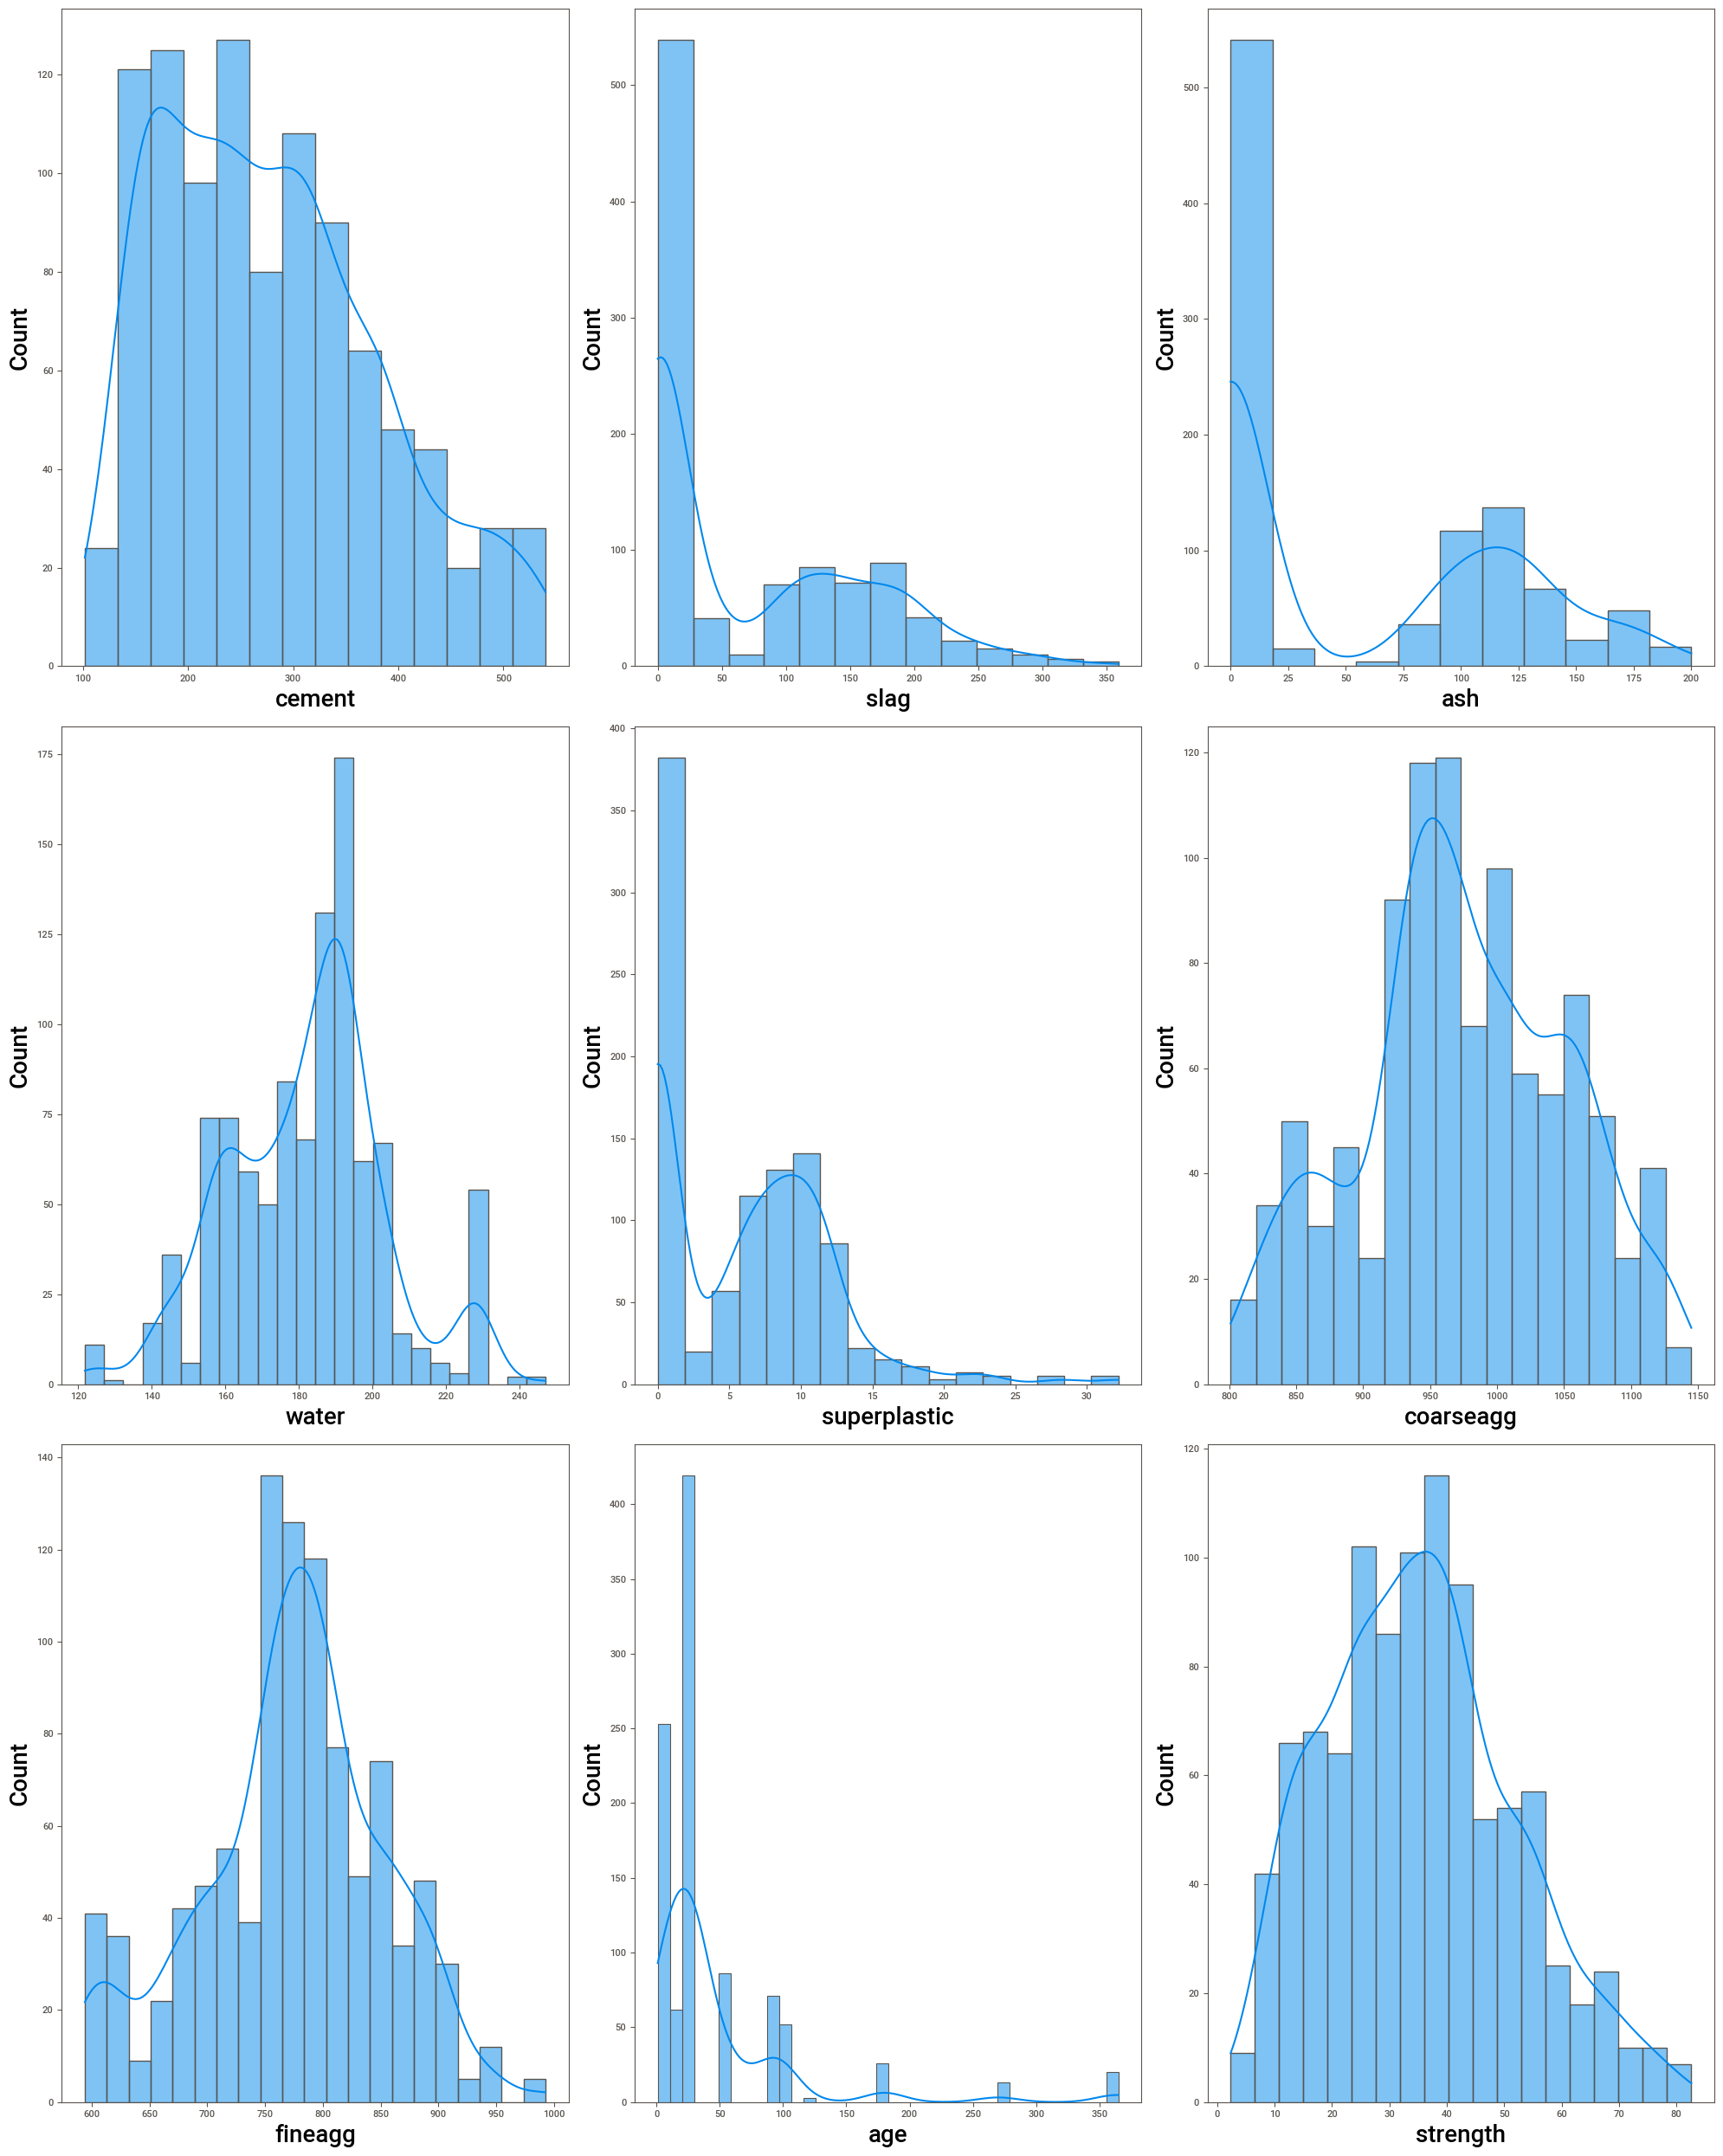

In [14]:
## let's see how data is distributed for every column

plt.figure(figsize=(20,25),facecolor='white')  # Setting the canvas size
plotnumber=1                                   # initializing the counter

for column in data:                            # getting columns form DataFrame
    if plotnumber<=9:                          # checking whether counter less than 9
        ax=plt.subplot(3,3,plotnumber)         # plotting 9 graphs
        sns.histplot(data[column],kde=True)    # to know the distribution
        plt.xlabel(column,fontsize=20)         # setting label for x 
        plt.ylabel('Count',fontsize=20)        # Setting label for y
    plotnumber+=1                              # Counter increament
plt.tight_layout()                             # to fit the subplot into fig size

### Insights from univariate analysis
- Cement, corse aggregate, fine aggregate are having almost normal distribution.
- Slag, ash, superplasticizer and age are rightly skewed.
- Water is slightly left skewed.
- Strength is close to normal distribution.

## Bivariate Analysis

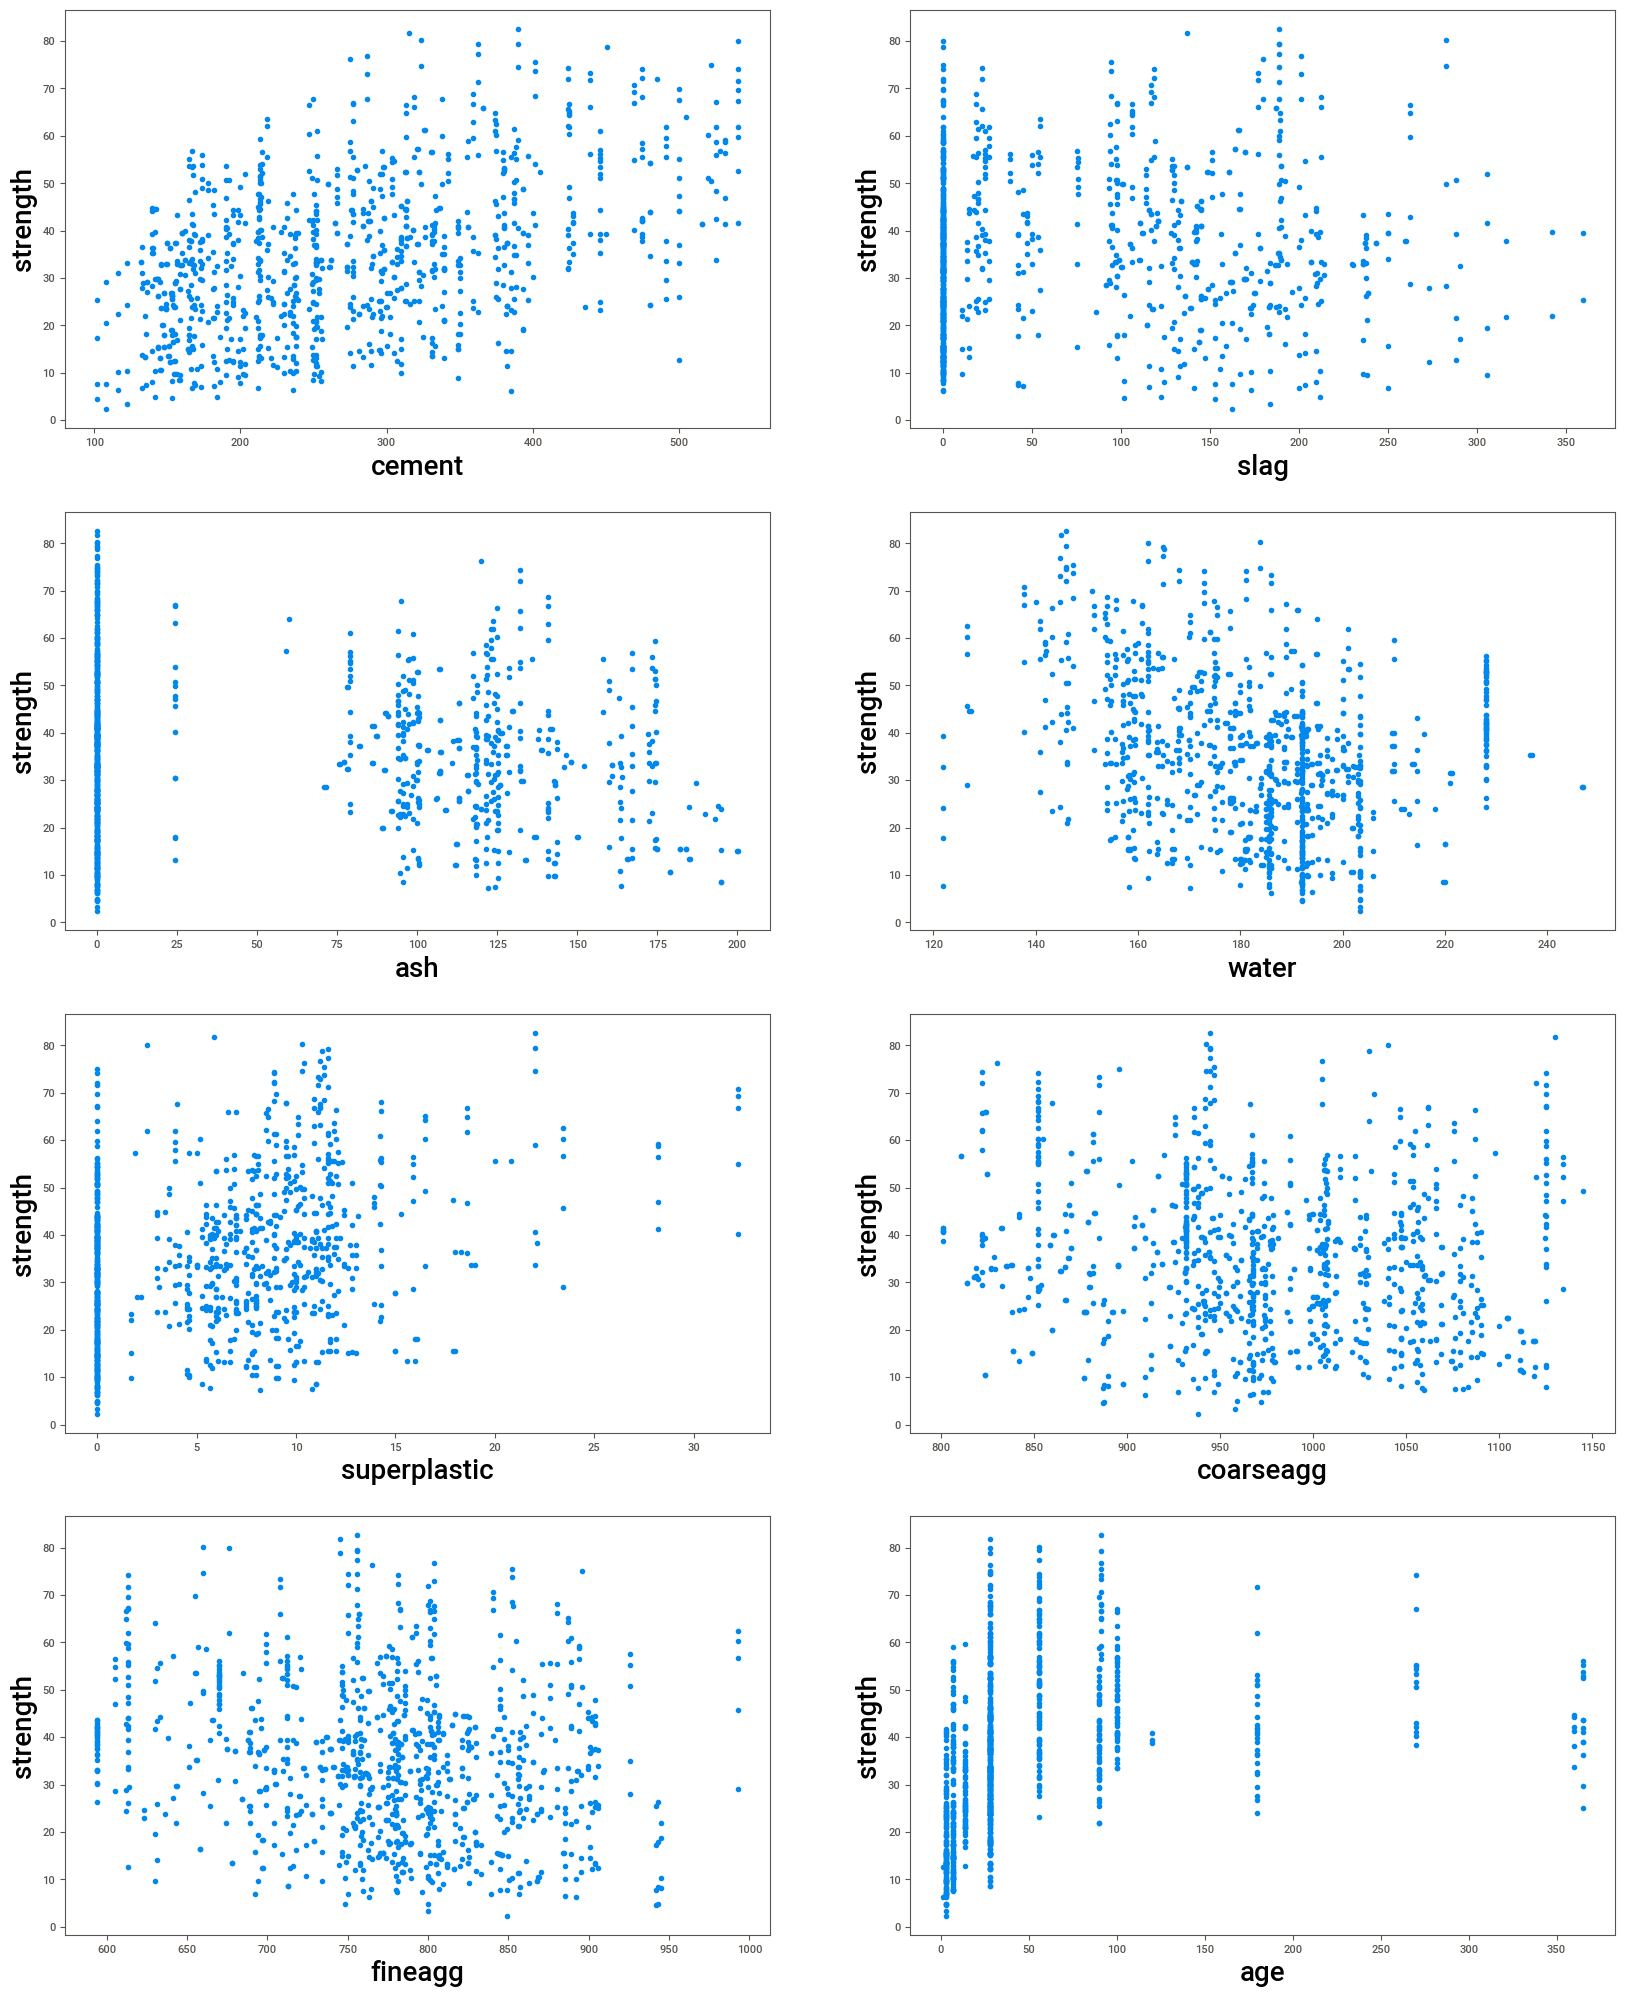

In [15]:
plt.figure(figsize=(20,25))                               # Setting the canvas size
plotnumber=1                                              # initializing the counter

for column in data:                                       # getting columns form DataFrame
    if plotnumber<=8:                                     # checking whether counter less than 8
        ax=plt.subplot(4,2,plotnumber)                    # ploting 8 graphs
        plt.scatter(x=data[column],y=data['strength'])    # to know relation between target and inputs
        plt.xlabel(column,fontsize=20)                    # setting x label
        plt.ylabel('strength',fontsize=20)                # setting y label
    plotnumber+=1                                         # counter increament
plt.show()                                                # to fit the subplot into fig size

### Insights from bivariate analysis
- There seems to be no definite relationship between any independent variable and the target variable.

## Multivariate Analysis

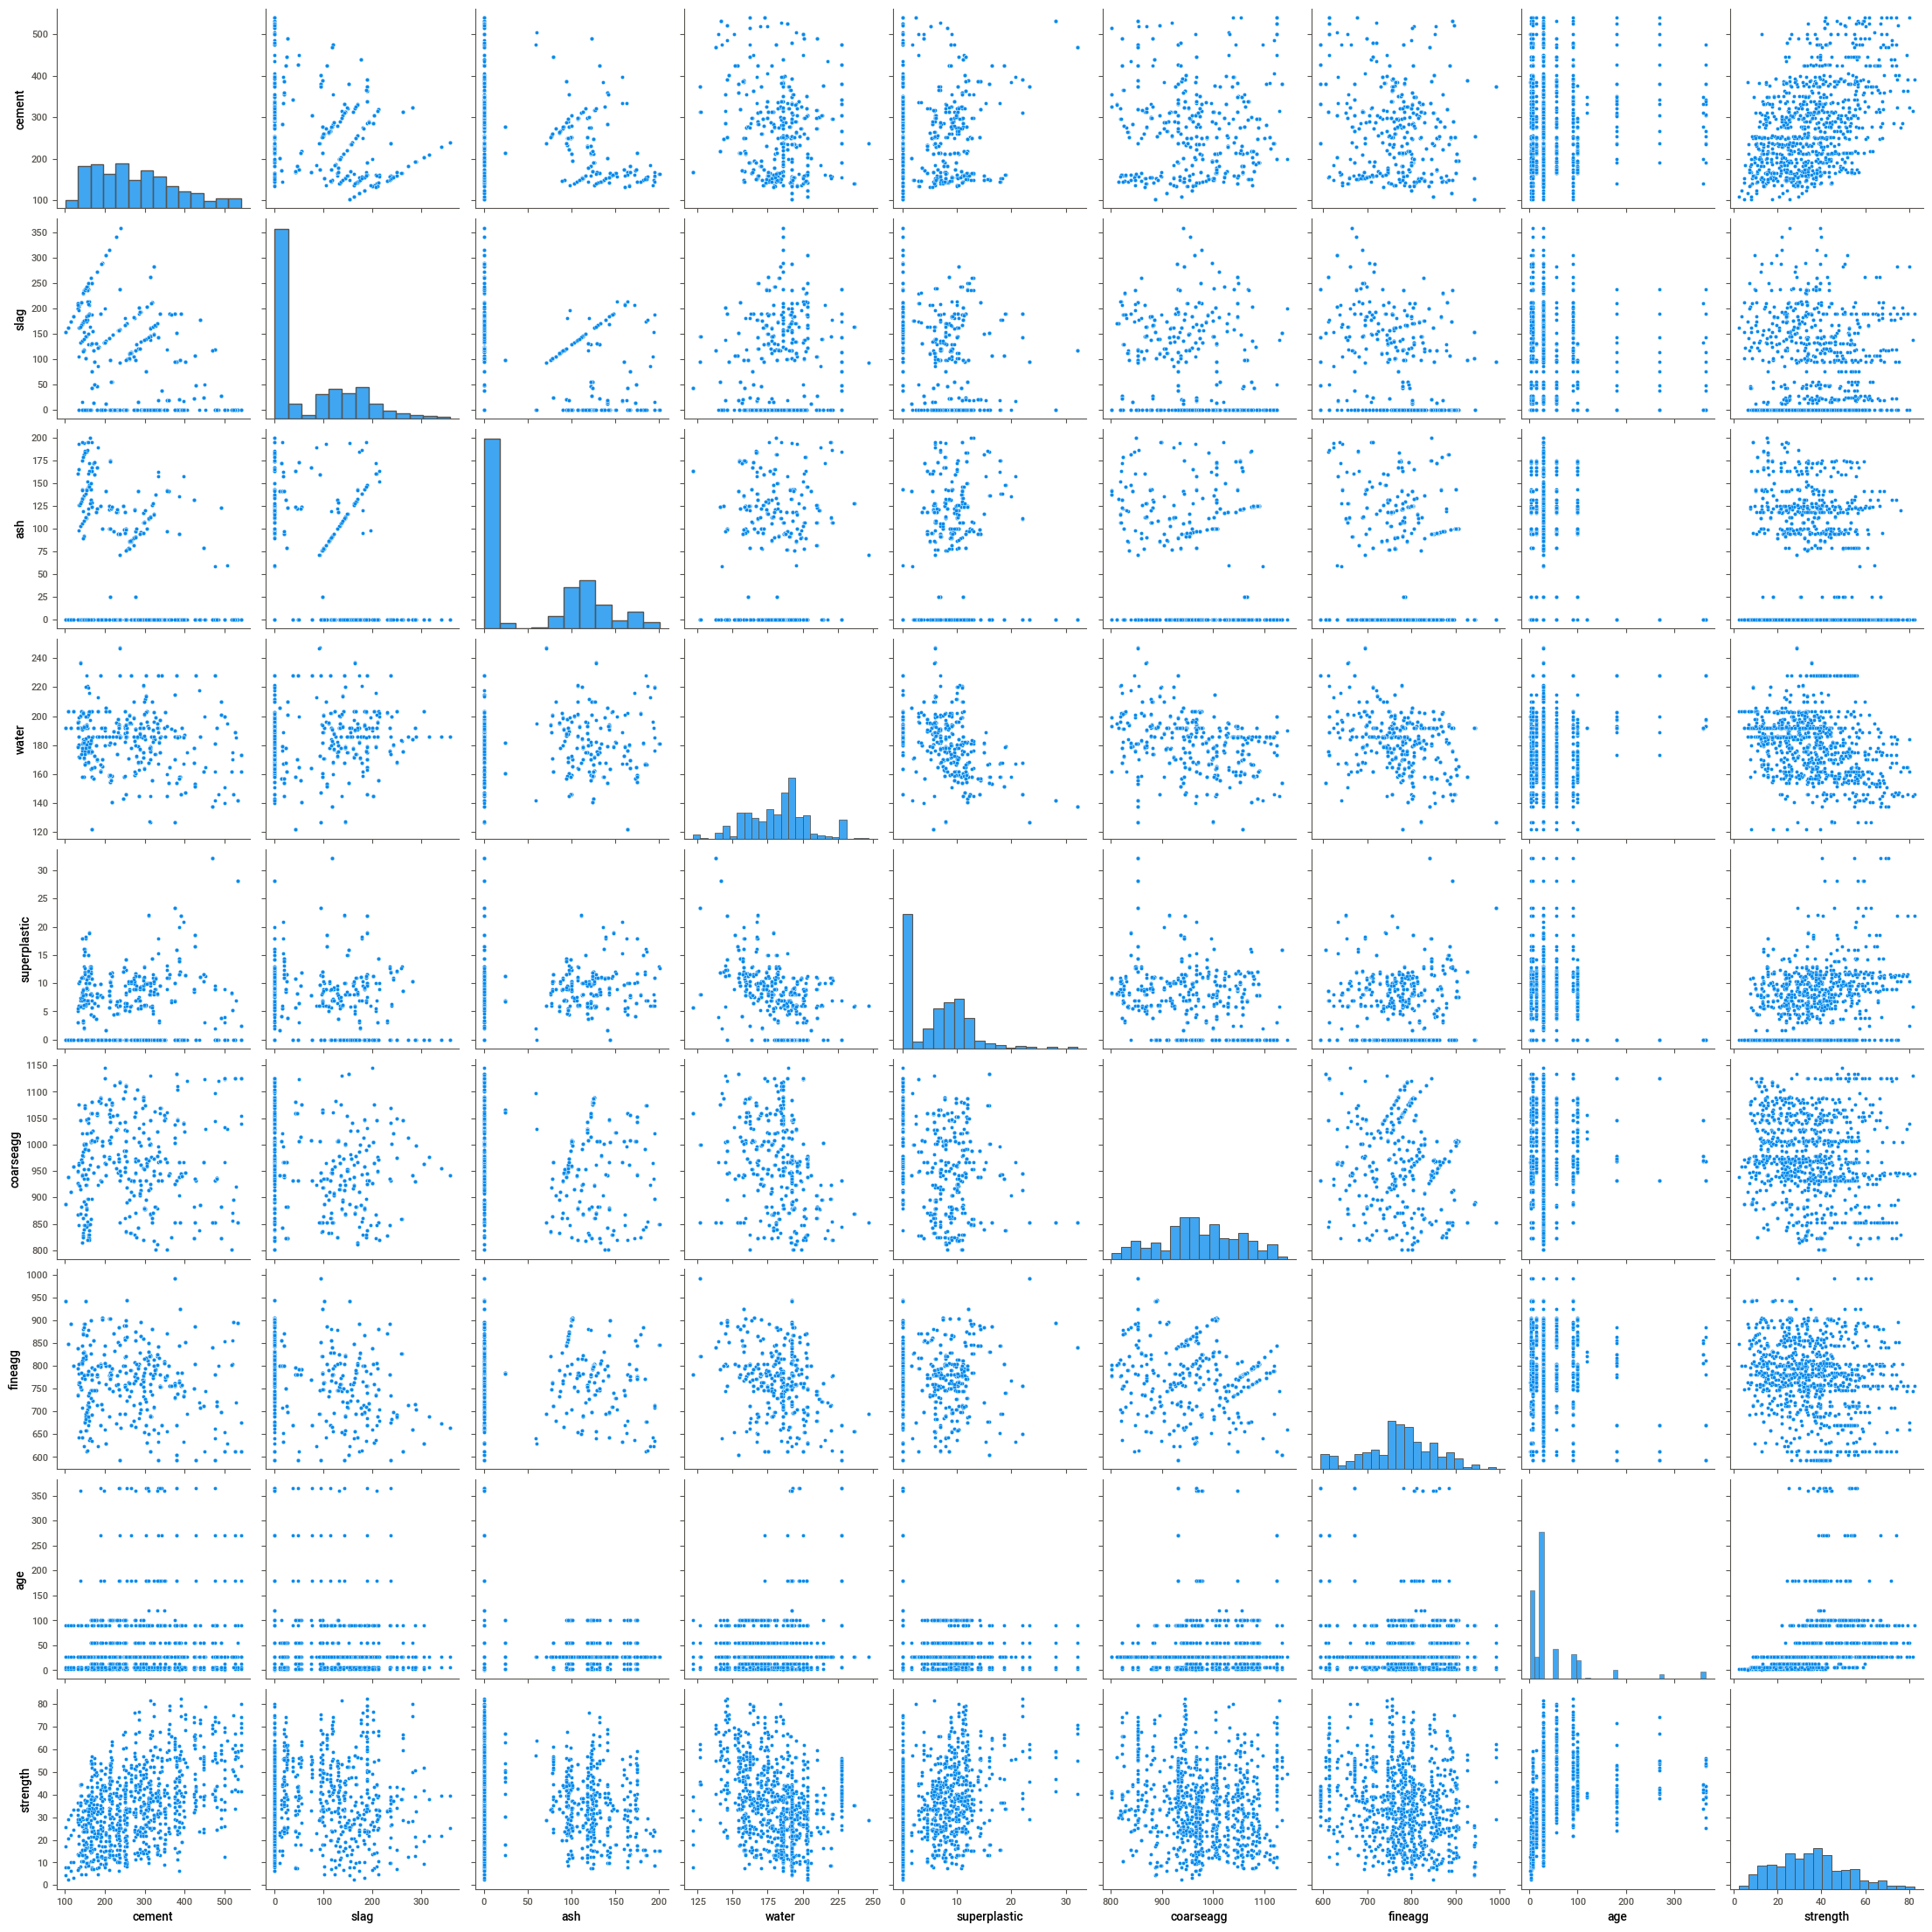

In [17]:
sns.pairplot(data)
plt.show()

### Insights from multivariate analysis
- There seems to be no high correlation between any 2 features. Although Cement and strength look like they may have some correlation.

# Data PreProcessing

* There are no null values to impute.
* There are no categorical data to encode.

### Checking for outliers

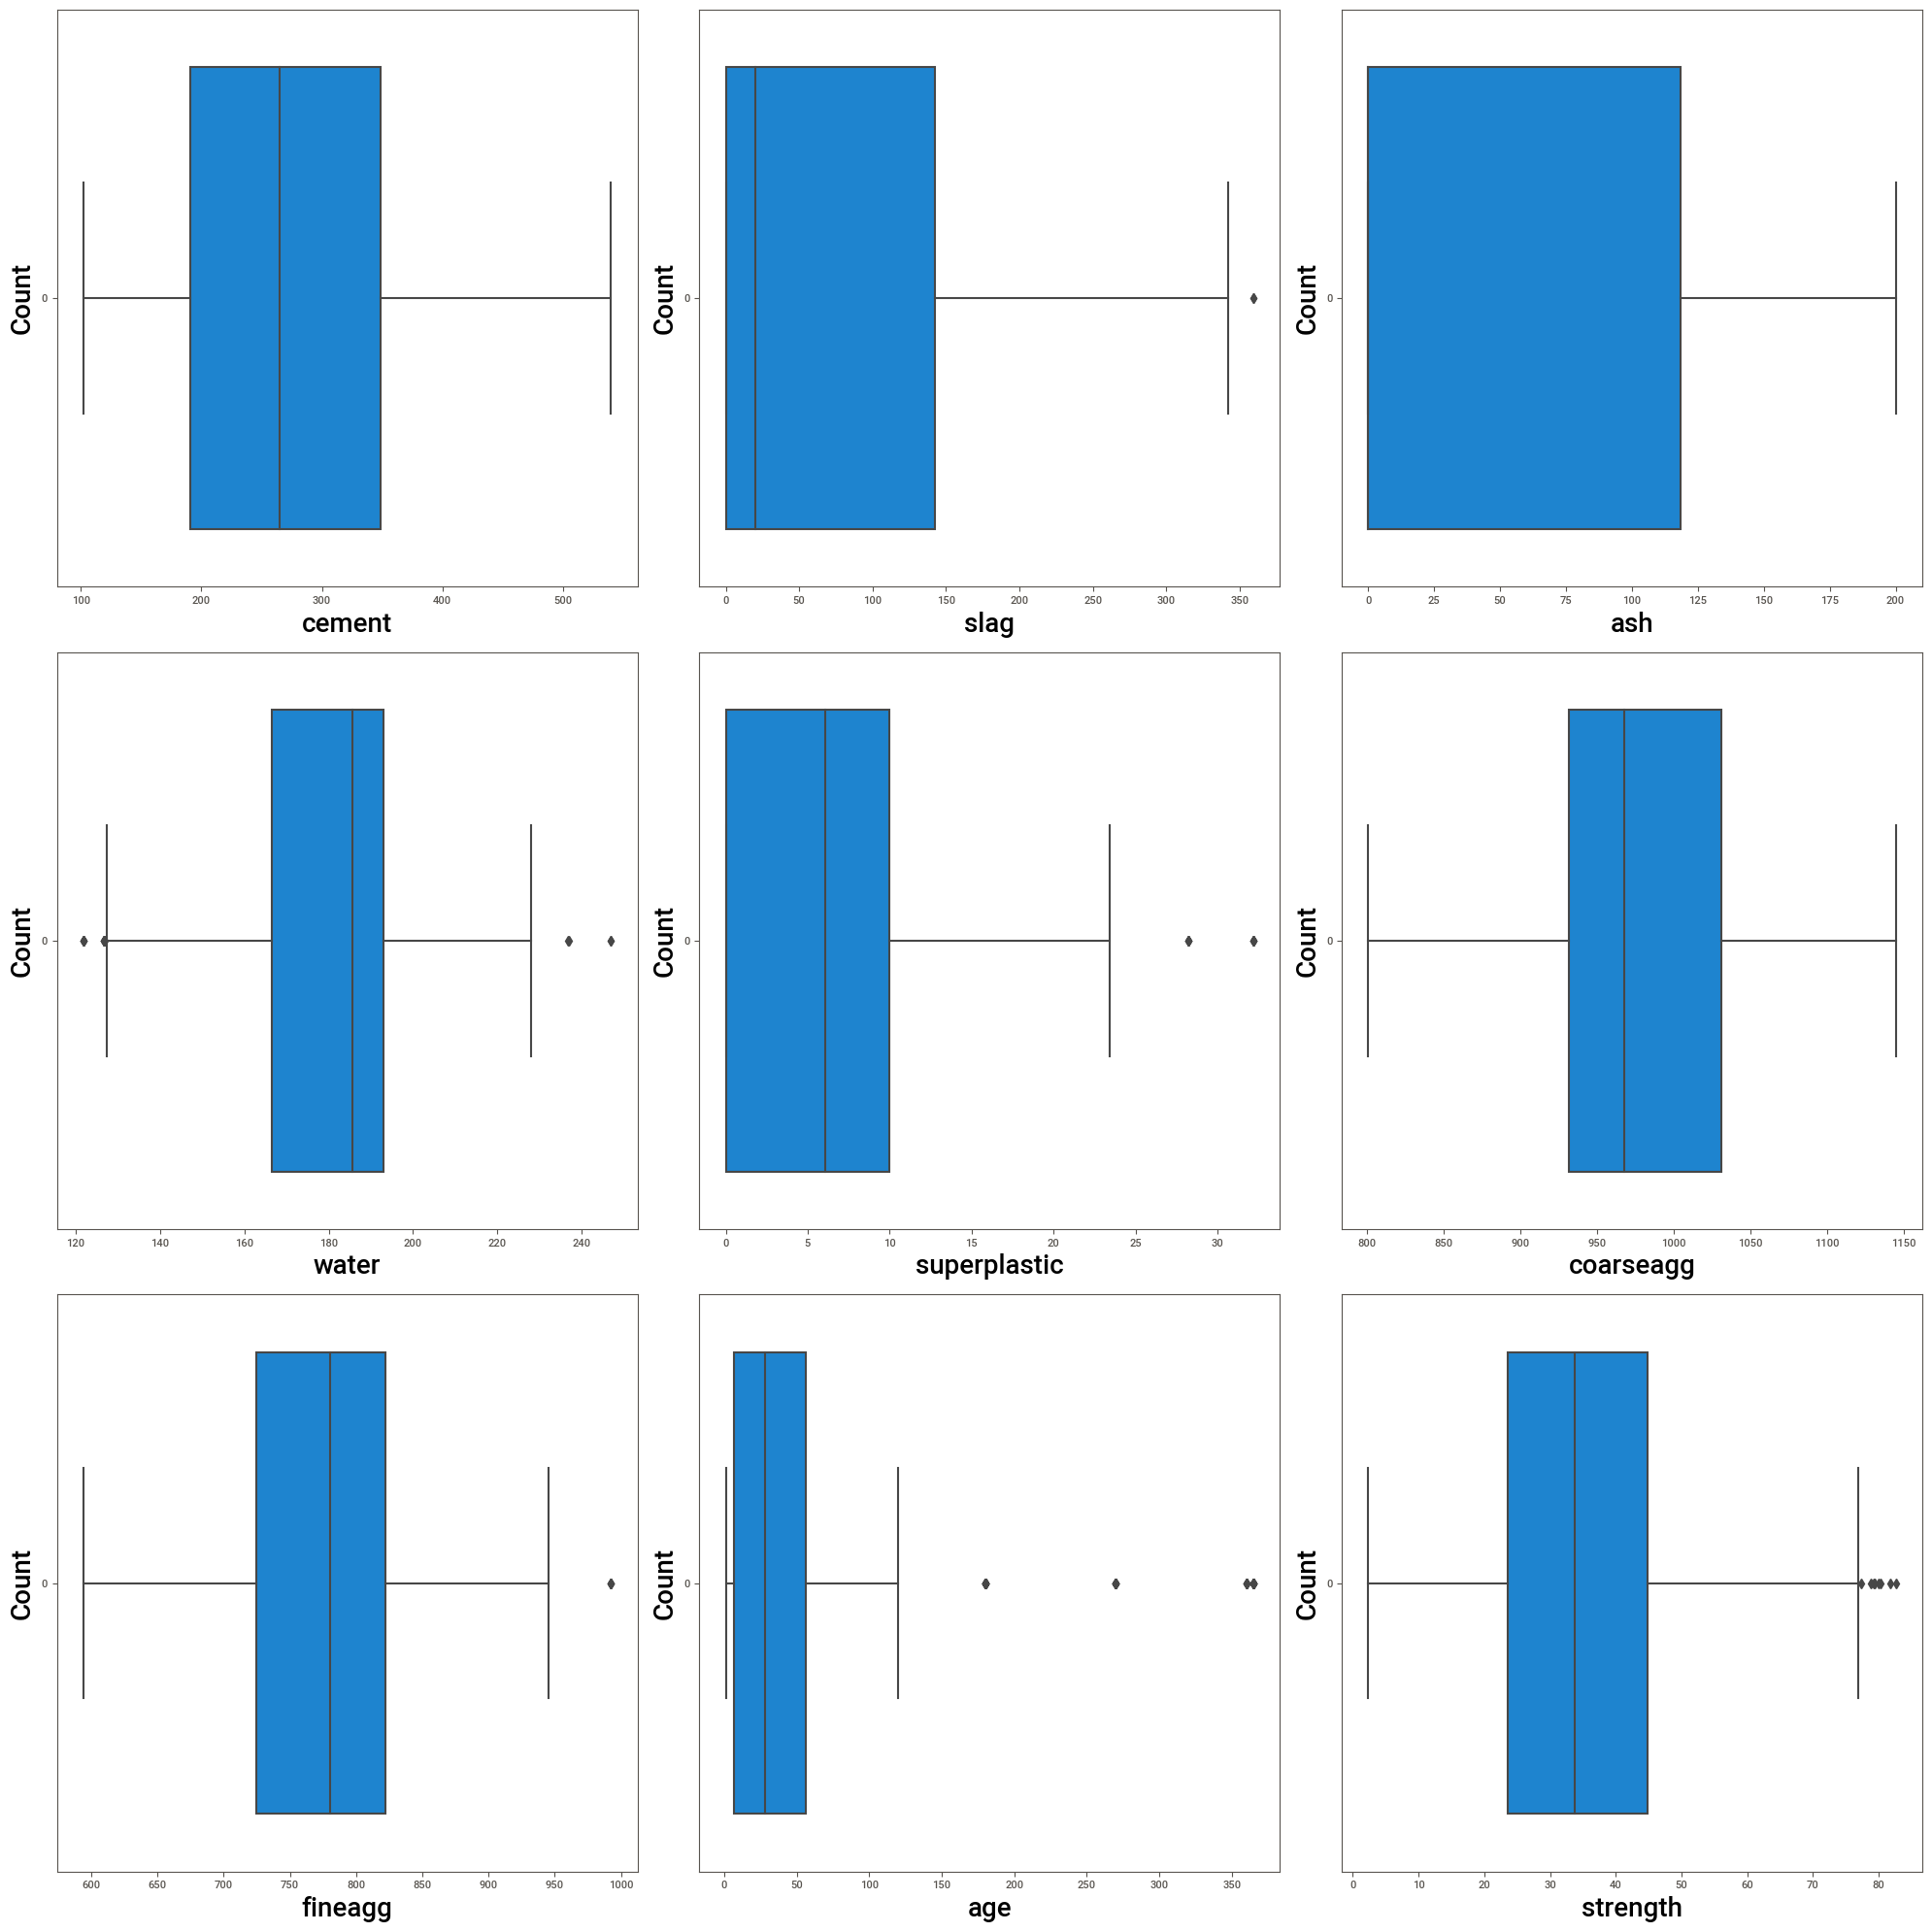

In [18]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column], orient='h')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Observations
- The features `slag`, `water`, `superplasticizer`, `fine aggregate`, `age` and `strength` are having outliers

# Feature Selection

- No redundant fetaures found in the dataset
- We will check correlation among independent features

<Axes: >

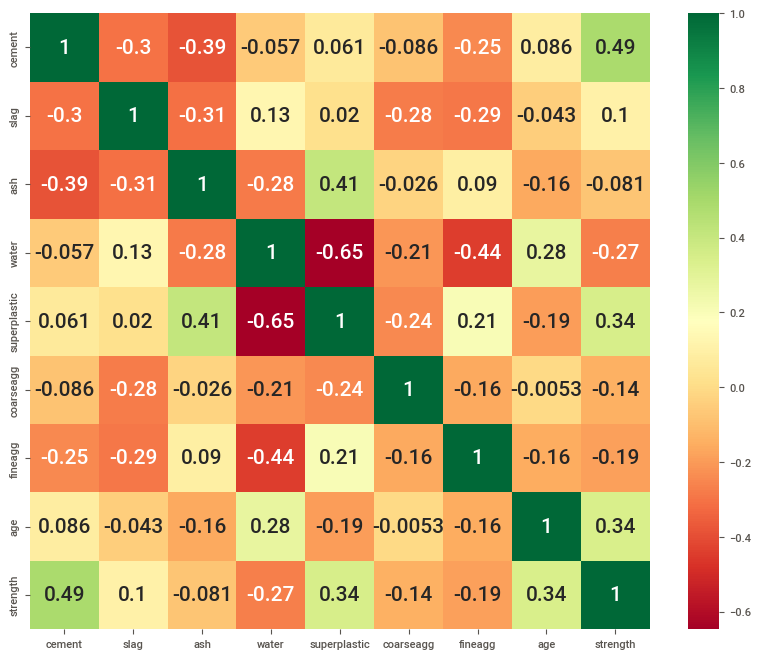

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})

### There is no high correlation between any two independent features.

## Splitting the dataset into train set and test set

In [20]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [21]:
## Creating independent and dependent variable
X = data.drop('strength',axis=1)
y = data.strength

In [22]:
## Creating testing and training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)

(804, 8)
(201, 8)


## Scaling the data

As we will be using many distance based Machine learning models and since the range of features are not in the same scale, we will scale the data.

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Model Creation

In [25]:
## Importig the required models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [26]:
## Importing requried evaluation metrics

import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score

## Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_hat = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [28]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
import math
rmse= math.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [29]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.5801703029028777
mse: 125.2456480505019
rmse: 11.191320210346136
mae: 8.895256221464194


In [30]:
X_train.shape

(804, 8)

In [31]:
adj_r2score = 1-(1-0.58)*(804-8)/(804-8-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.5794716981132075


## Support Vector Regressor

In [32]:
svr=SVR()
svr.fit(X_train, y_train)

y_hat = svr.predict(X_train)
y_pred = svr.predict(X_test)

In [33]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.5418549924150333
mse: 136.6760588229826
rmse: 11.690853639618563
mae: 9.030146667565429


In [34]:
adj_r2score = 1-(1-0.542)*(804-8)/(804-8-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.5394213836477988


## KNN

In [35]:
error_rate=[]
for i in range(1,11):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

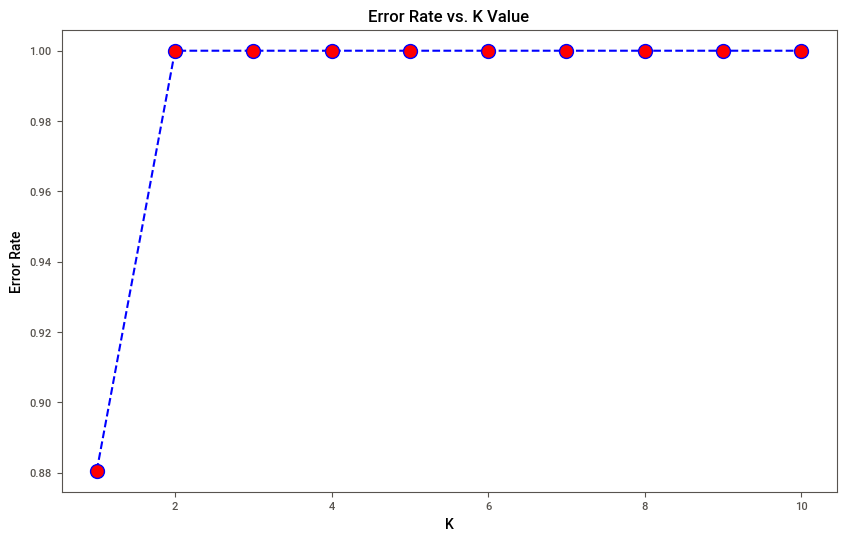

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [37]:
# chosing k value as 3
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train,y_train)

y_hat = knn1.predict(X_train)
y_pred = knn1.predict(X_test)

In [39]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.7341605267763692
mse: 79.30653150912107
rmse: 8.905421467236746
mae: 6.634842454394694


In [40]:
adj_r2score = 1-(1-0.734)*(804-8)/(804-8-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.7296603773584905


## Decision Tree

In [41]:
dt=DecisionTreeRegressor()  
dt.fit(X_train,y_train)

y_hat = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [42]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.8743035161332231
mse: 37.49838967661692
rmse: 6.12359287319274
mae: 3.94092039800995


In [43]:
adj_r2score = 1-(1-0.874)*(804-8)/(804-8-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8698364779874214


## Random Forest

In [44]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_hat = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [45]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.9116146208988762
mse: 26.367558465376153
rmse: 5.134935098458027
mae: 3.4467562035062818


In [46]:
adj_r2score = 1-(1-0.911)*(804-8)/(804-8-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.9098867924528302


## Gradient Boosting

In [47]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_hat = gb.predict(X_train)
y_pred = gb.predict(X_test)

In [48]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.8948280804890665
mse: 31.375401280426438
rmse: 5.601374945531359
mae: 4.122297501249154


In [49]:
adj_r2score = 1-(1-0.894)*(804-8)/(804-8-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.8938666666666667


## X Gradient Boosting

In [50]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_hat = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

In [51]:
print("metrics on test data \n")

print("r2score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))
print("rmse:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("mae:", mean_absolute_error(y_test, y_pred))

metrics on test data 

r2score: 0.9413317653519365
mse: 17.50219462625524
rmse: 4.18356243245577
mae: 2.6345342495666806


In [53]:
adj_r2score = 1-(1-0.941)*(804-8)/(804-8-1)
print("adjusted r2score:", adj_r2score )

adjusted r2score: 0.940925786163522


# Evaluation Summary

#### R2 score is used to measure how well the a regressio model fits the data. But R2 score alone for a regression problem cannot always be considered to evaluate the performance of model.  As the number of predictors increases, R2 score also increases even if those variables are not truely important.

#### To overcome this issue, we have also checked adjusted R2 score.

In [61]:
# creating a dictionary
dict={"Model":["Linear Regression","Support Vector","K Nearest Neighbor","Decision Tree","Random Forest","Gradient Boosting","XGradient Boosting"],
     "R2_Score":[0.58, 0.54, 0.73, 0.87, 0.91, 0.89, 0.94],
     "Adjusted R2_Score":[0.579, 0.539, 0.729, 0.869, 0.91, 0.89, 0.94],
     "MSE":[125.24, 136.67, 79.30, 37.49, 26.36, 31.37, 4.18],
     "RMSE":[11.19, 11.69, 8.90, 6.12, 5.13, 5.60, 4.18],
     "MAE":[8.89, 9.03, 6.63, 3.94, 3.44, 4.12, 2.63]}

In [62]:
scores=pd.DataFrame(dict)

In [63]:
score=scores.sort_values(by="R2_Score", ascending=False)
score

,Model,R2_Score,Adjusted R2_Score,MSE,RMSE,MAE
6,XGradient Boosting,0.94,0.940,4.18,4.18,2.63
4,Random Forest,0.91,0.910,26.36,5.13,3.44
5,Gradient Boosting,0.89,0.890,31.37,5.60,4.12
3,Decision Tree,0.87,0.869,37.49,6.12,3.94
2,K Nearest Neighbor,0.73,0.729,79.30,8.90,6.63
0,Linear Regression,0.58,0.579,125.24,11.19,8.89
1,Support Vector,0.54,0.539,136.67,11.69,9.03


# Conclusion

#### After analysing all the metrics, we can conclude that `XG Boost Regressor` is the best model for our regression problem.
#### The XG Boost model has least values for MSE, RMSE and MAE.
#### The second best model for this problem is `Random Forest'.

In [37]:
xgb.feature_importances_

array([0.22645365, 0.13332348, 0.03001379, 0.1073639 , 0.17932603,
       0.0306537 , 0.05839461, 0.23447083], dtype=float32)

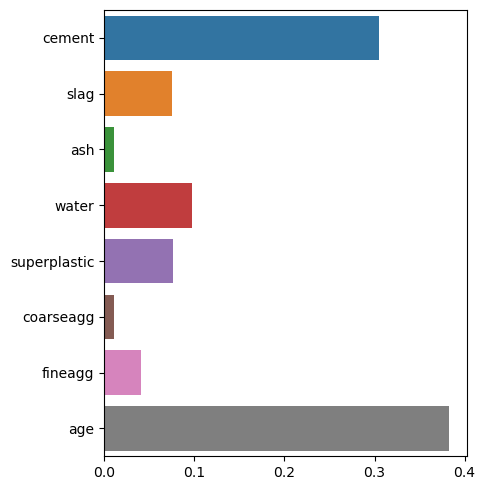

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(x=gb.feature_importances_,y=X.columns)
plt.tight_layout()

### According to the above plot the features that most impact the compressive strength of concrete are:
- "Age of concerte",
- "Cement quantity in the concrete",
- "Amount of water in the concrete",
- "Amount of slag used for the concrete",
- "Quantity of superplaticizers used in the concrete".


#### Use of Coarse aggregate, fine aggregate and fly ash have very little effect on the compressive strength of the concrete.

### Task 1:- Prepare a complete data analysis report on the concrete data.

● Univariate, bivariate and multivariate analysis are done for the given data.

### Task 2:- Create a machine learning model which can predict the future strength of a concrete mix, based on its constituents’ composition and also the age of the mix.

● After data preprocessing, the data was tested under different regression models and we have found that the most vital features which determines the compressive strength of concrete are `age`, `cement` and `water`.

● The second most important features are `slag` and `superplasticizers`.

## Challenges Faced:

* There were outliers on the independent features, which when imputed with median, upper limit and lower limit didn't give a better metrics for the model. 
* We have seen that hyperparemeter tuning was not improved the models performance.
* There were outliers on the Target field(strength), which are neither removed nor imputed with any values as it is not preffered to alter the target variable.